/var/folders/jm/00462w_x4l95ptx8yhcqhdlr0000gn/T/ipykernel_13027/2320722112.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
/var/folders/jm/00462w_x4l95ptx8yhcqhdlr0000gn/T/ipykernel_13027/2320722112.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X_12'].fillna(df['X_12'].median(), inplace=True)


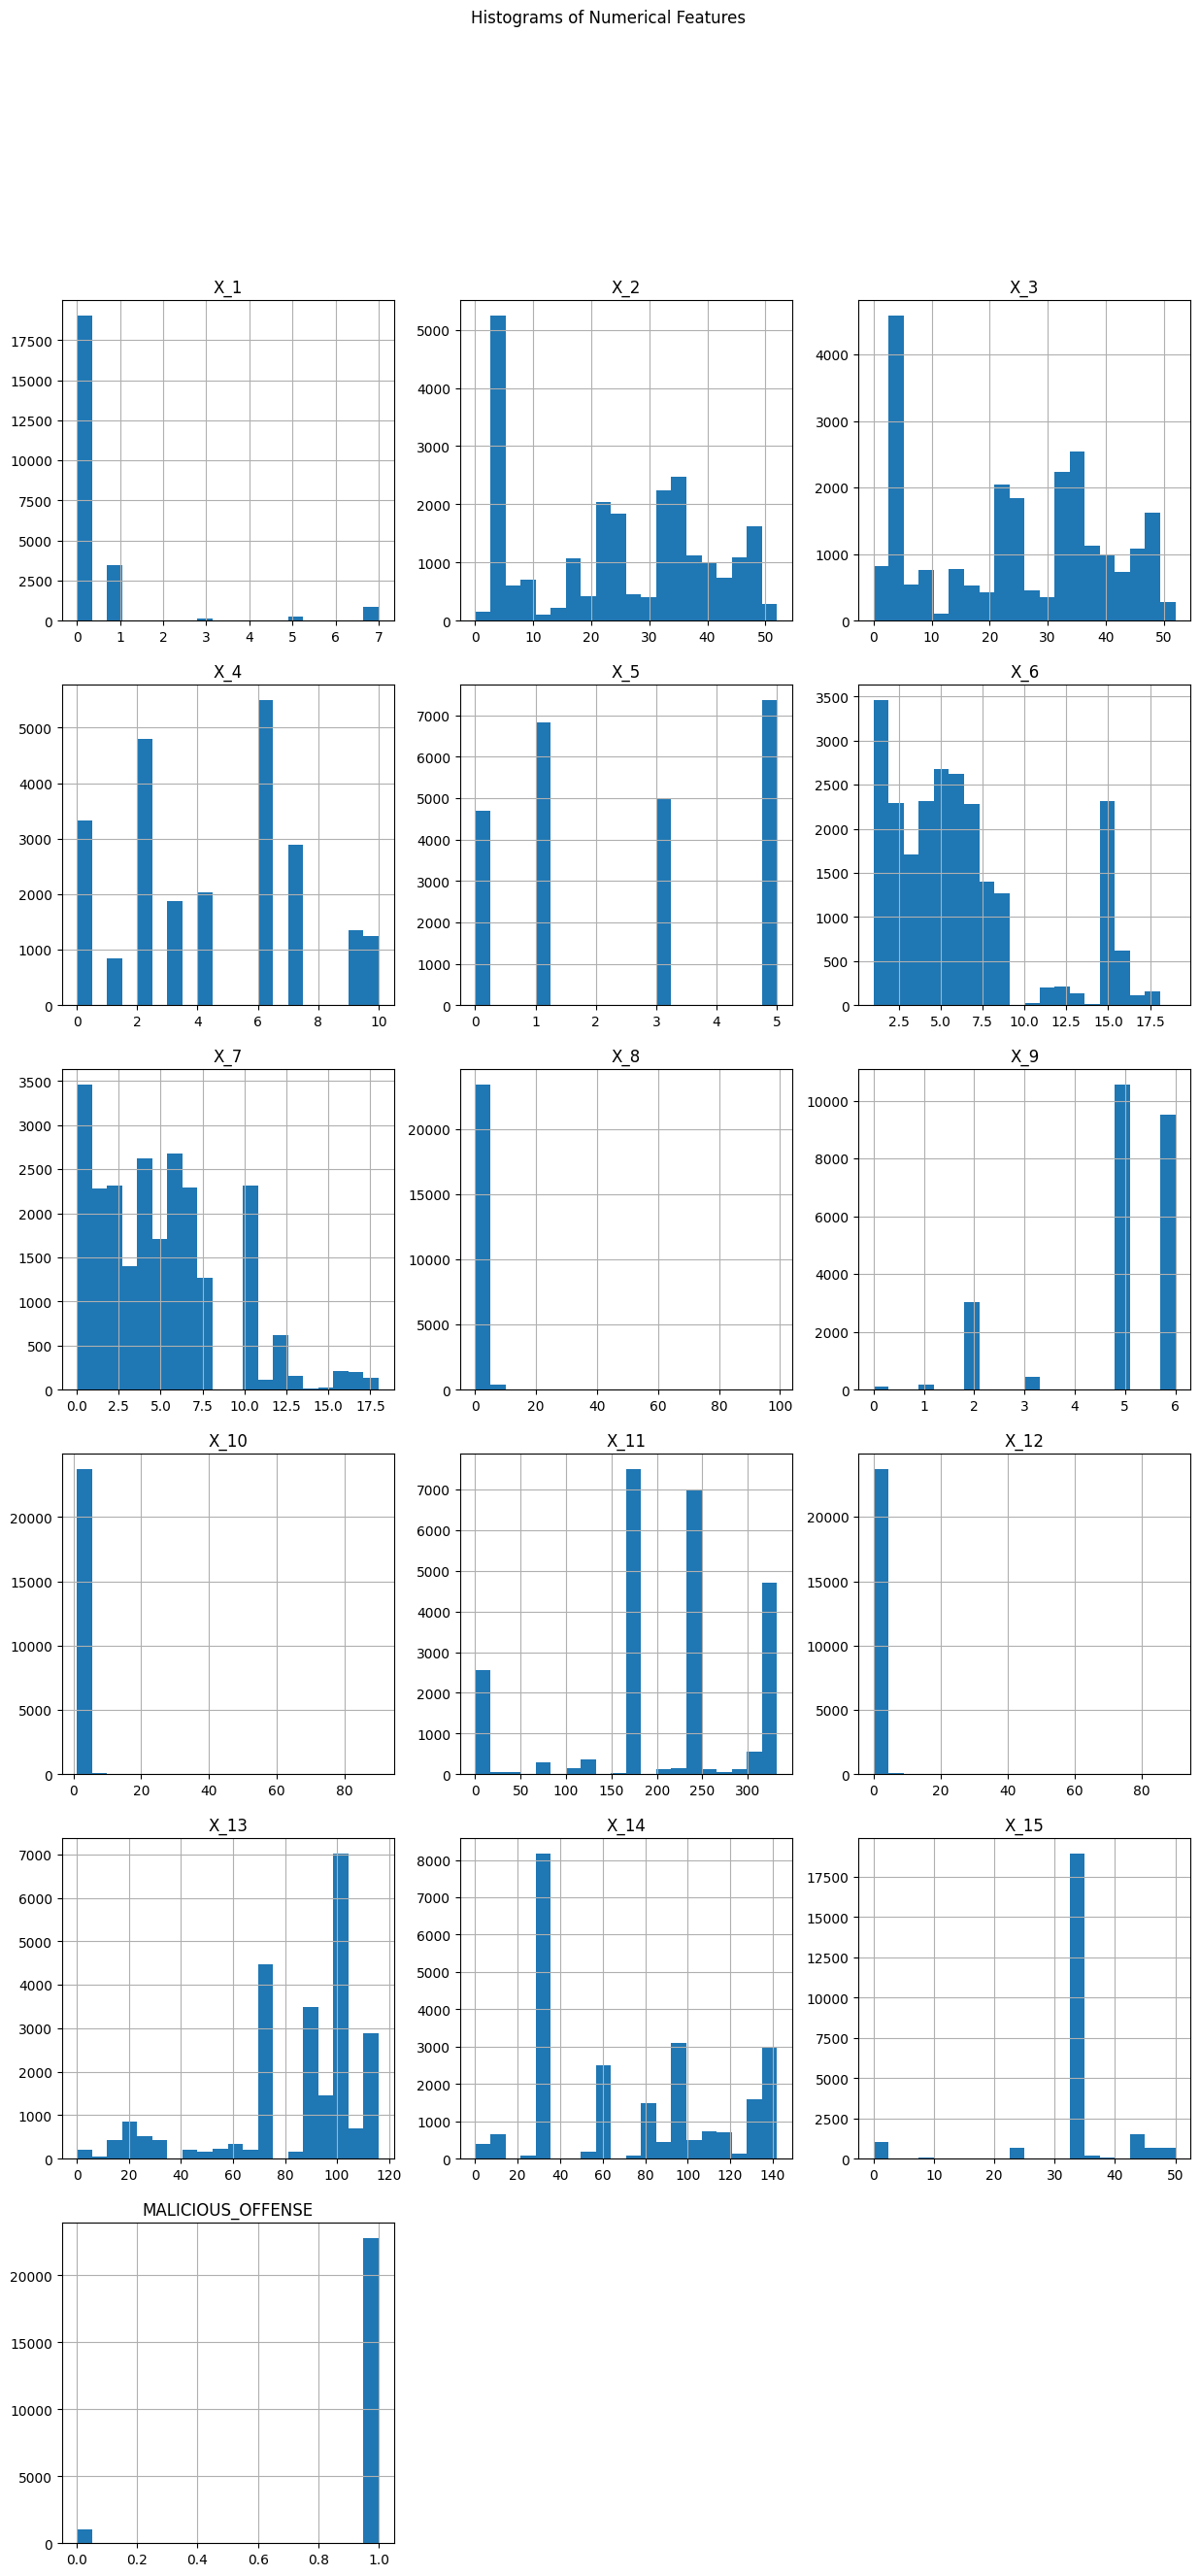

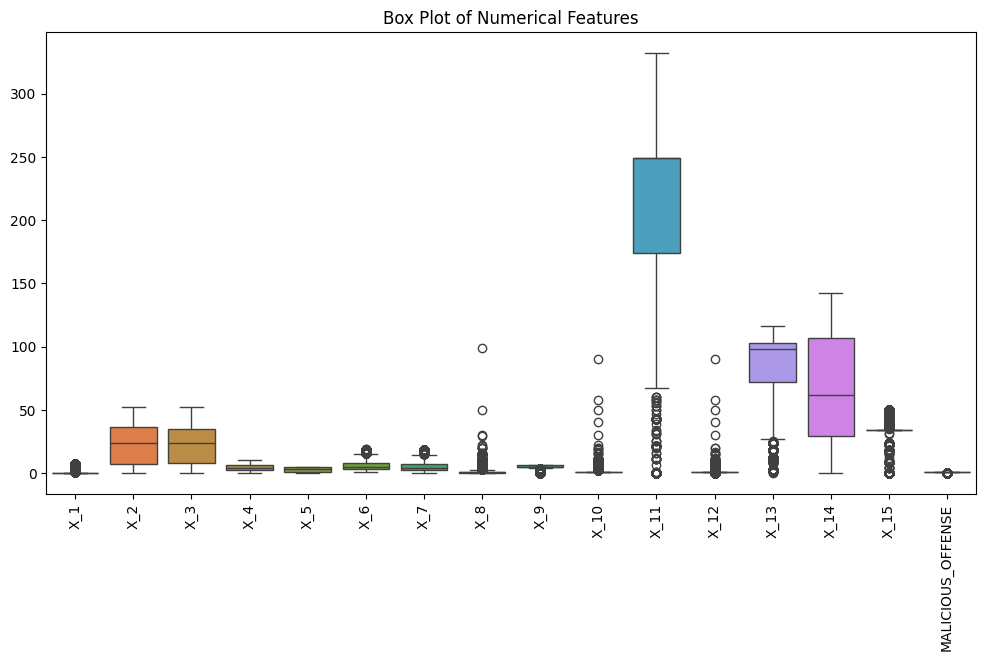

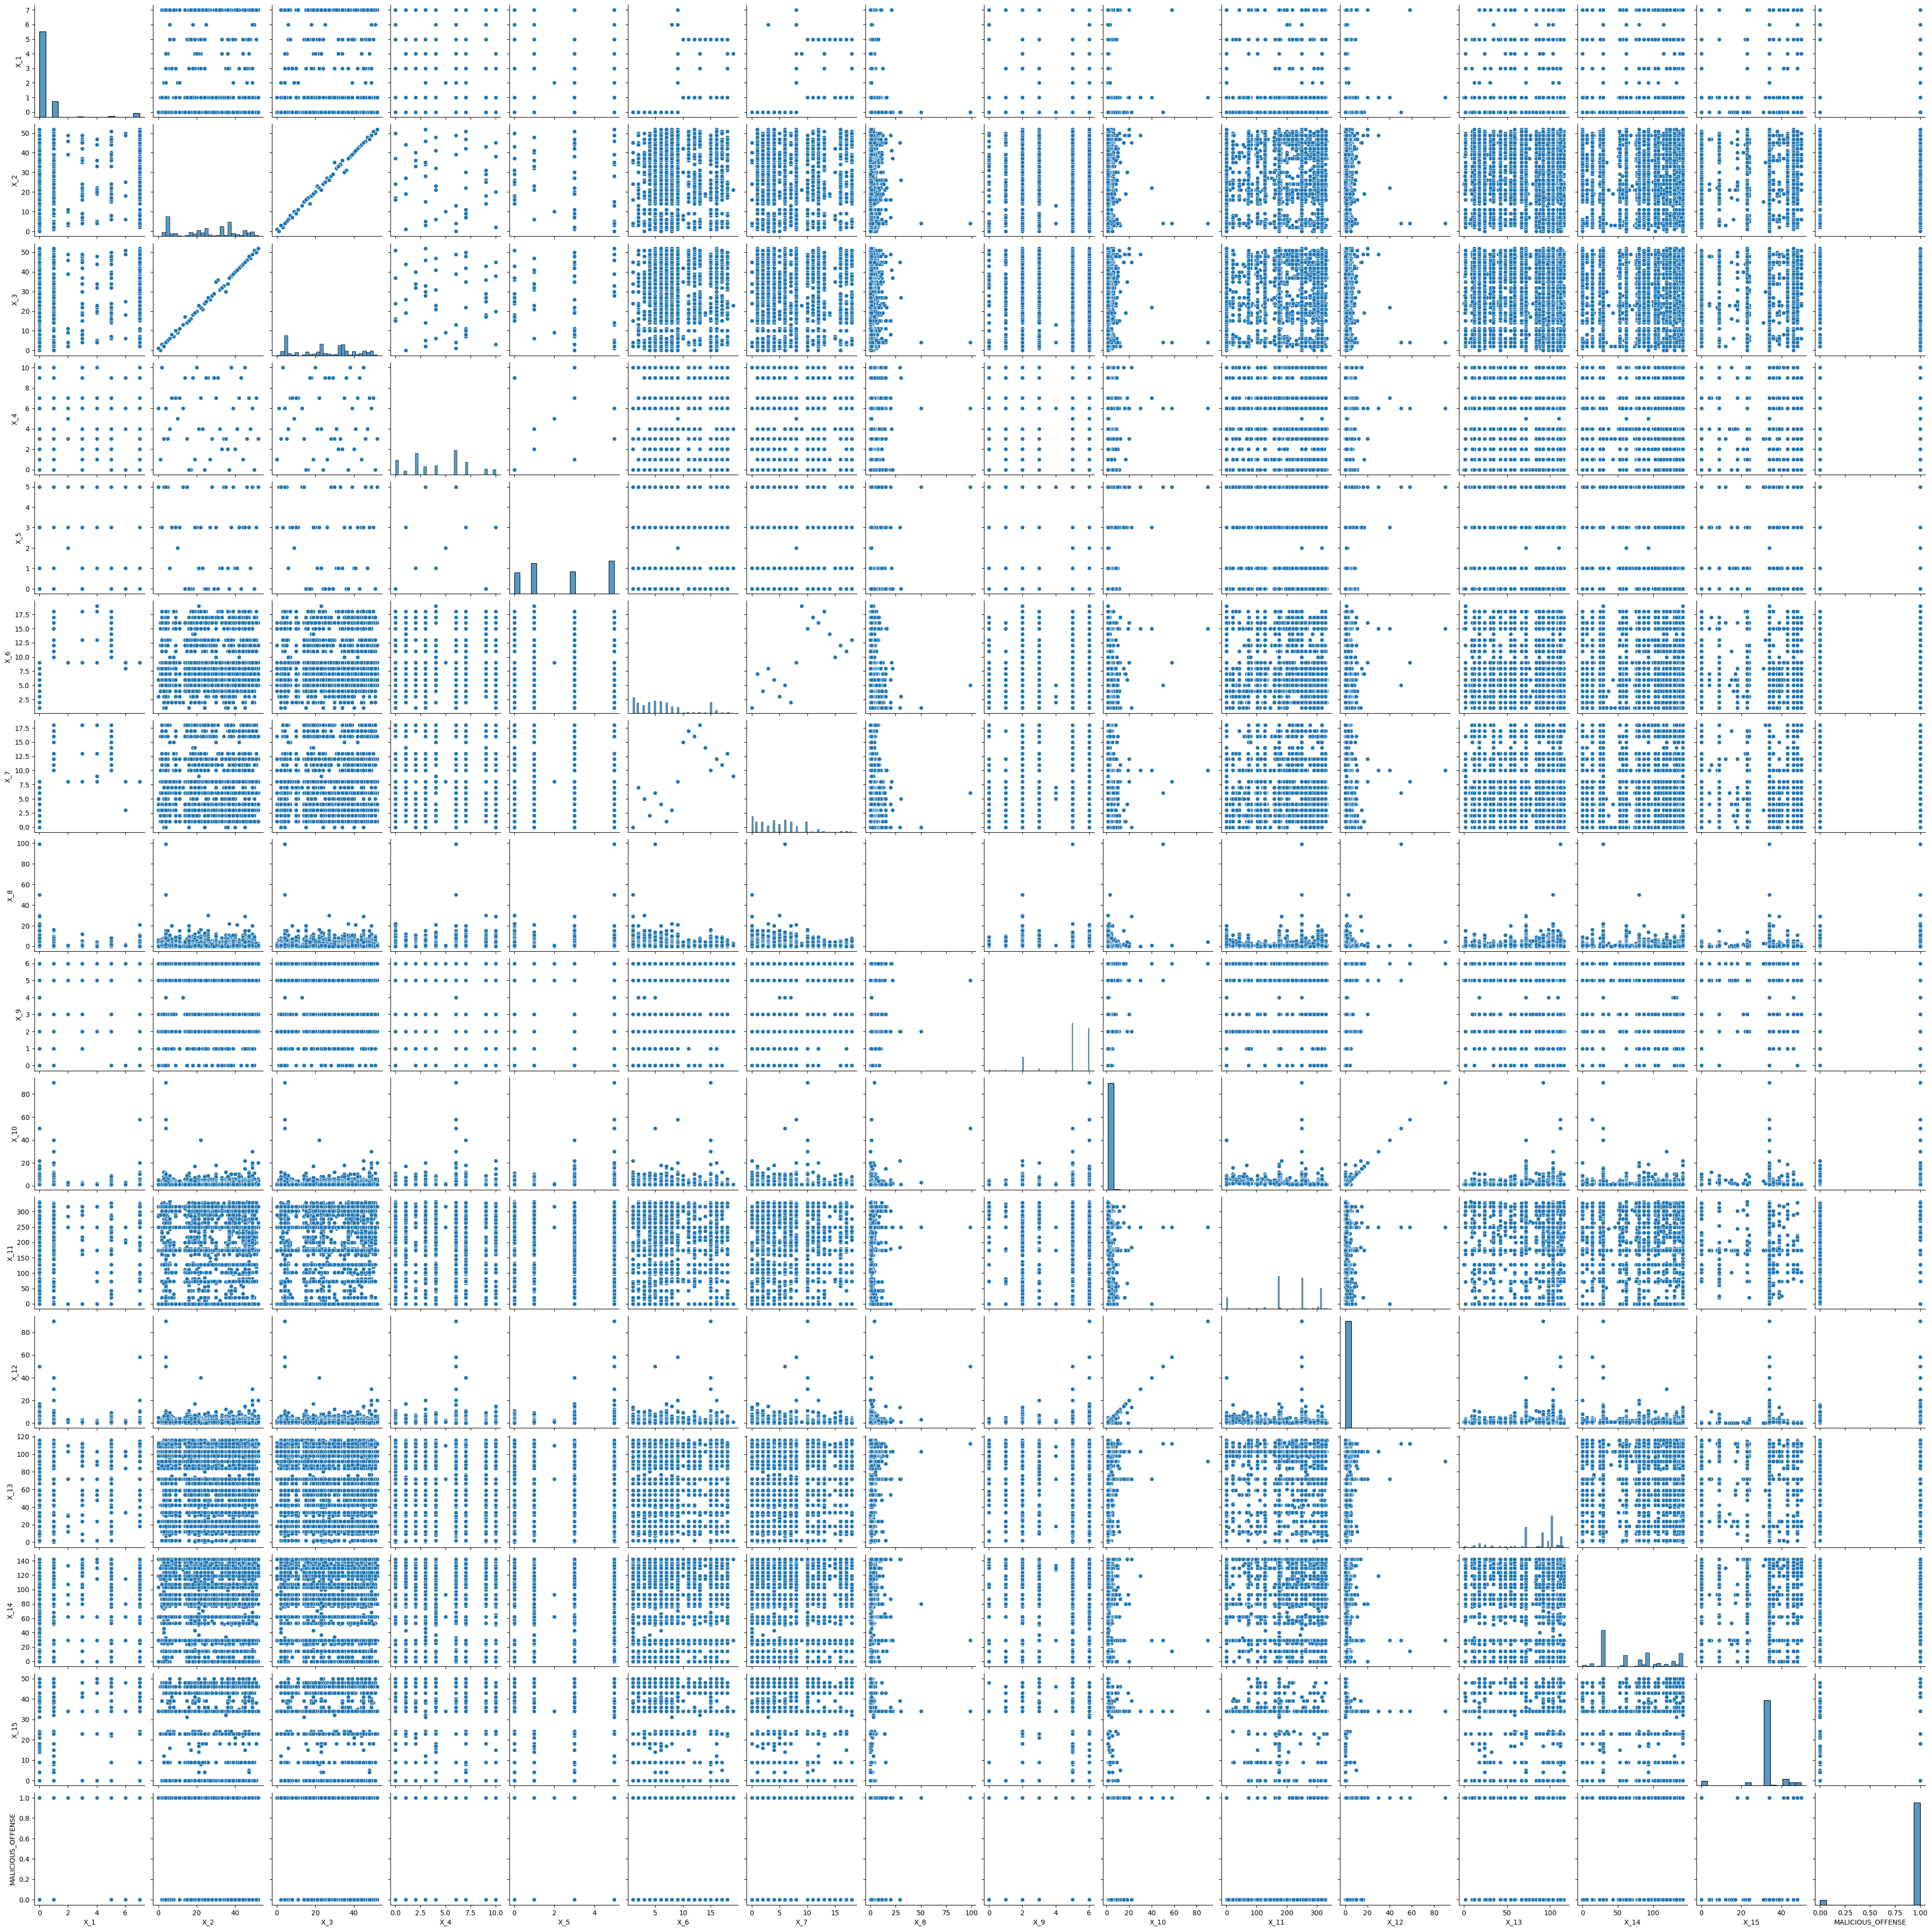

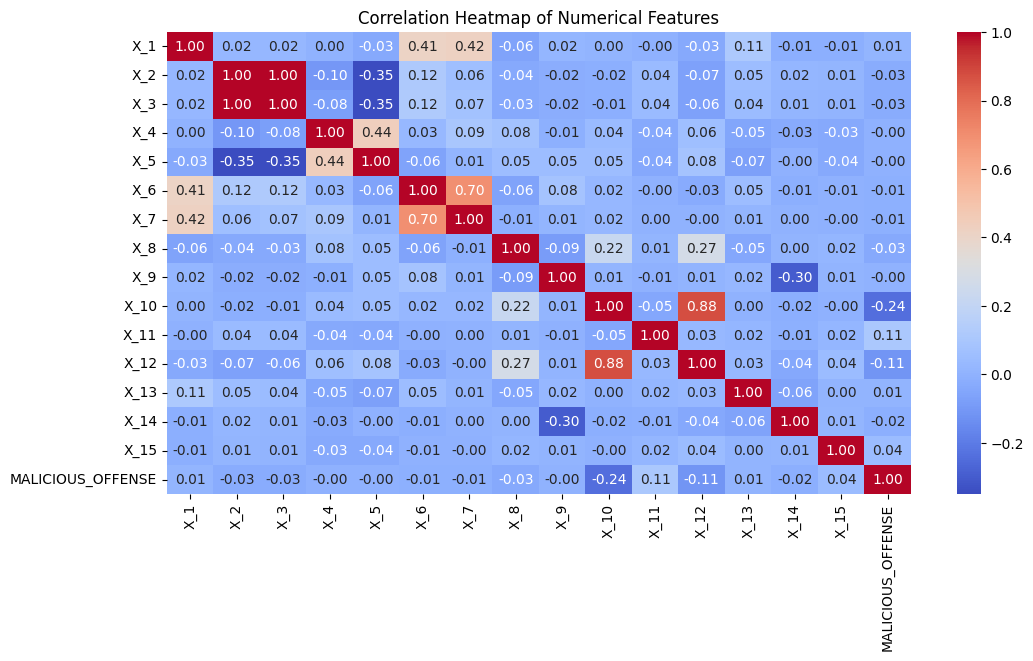

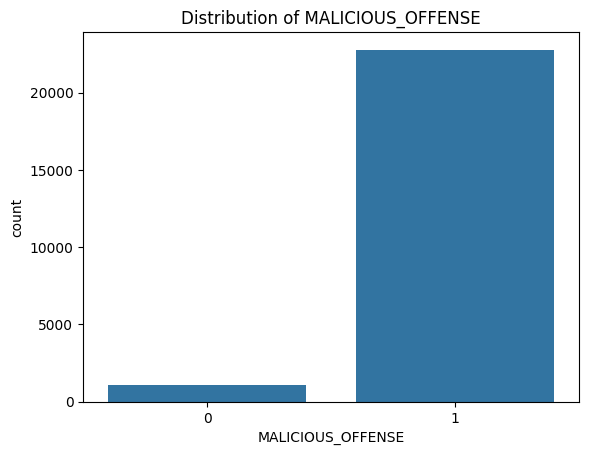

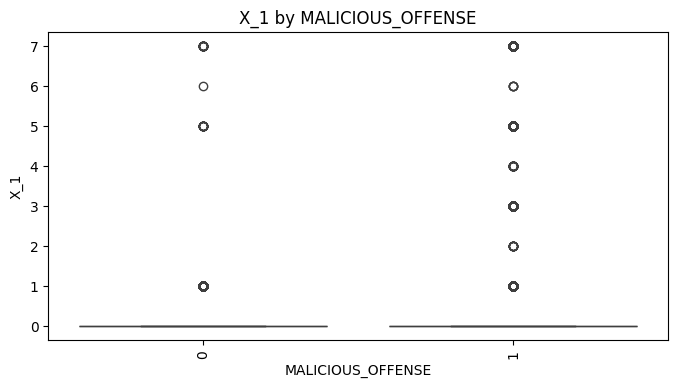

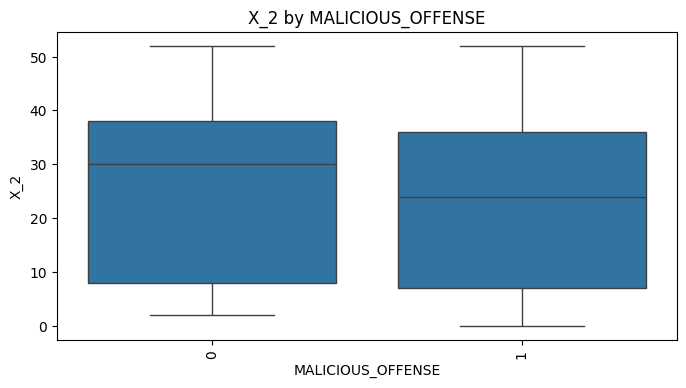

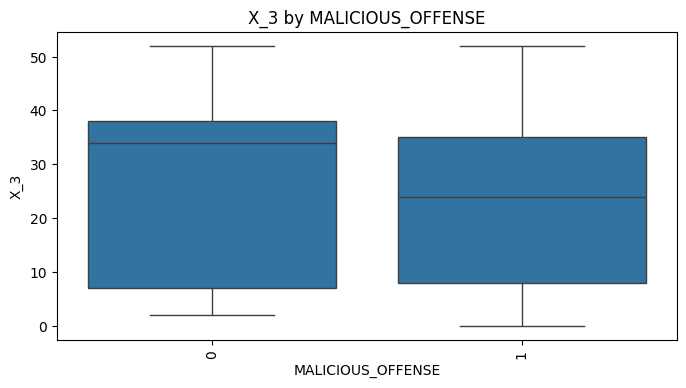

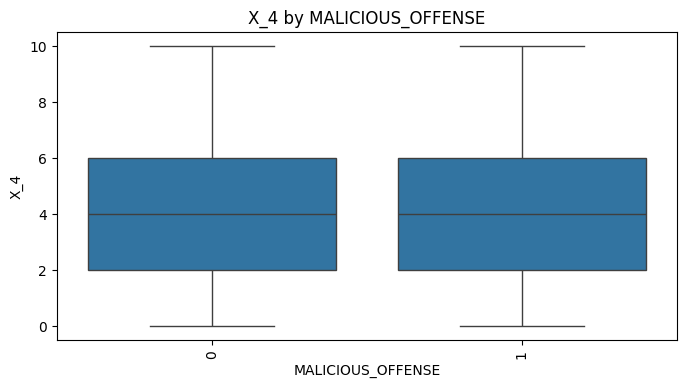

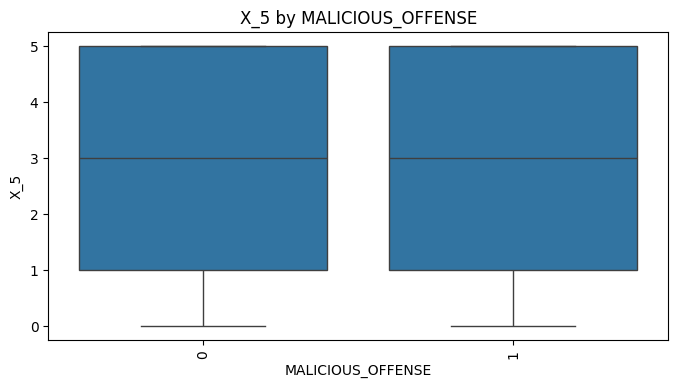

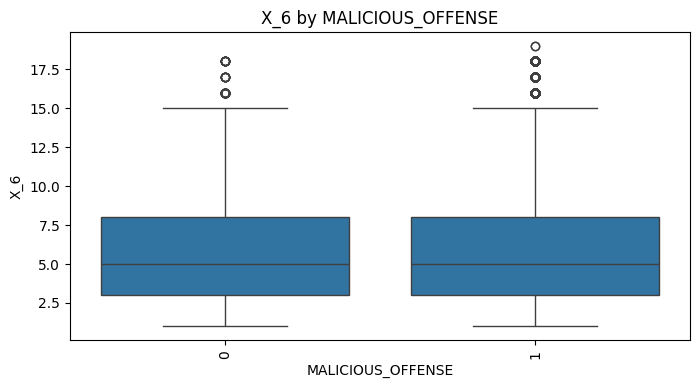

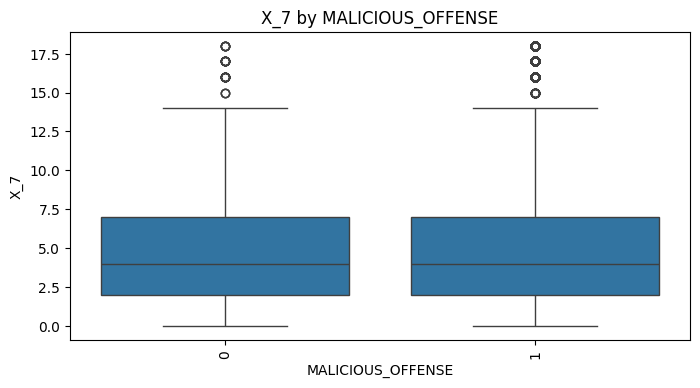

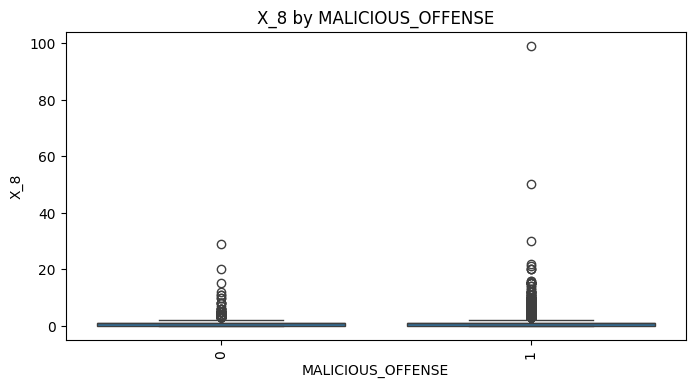

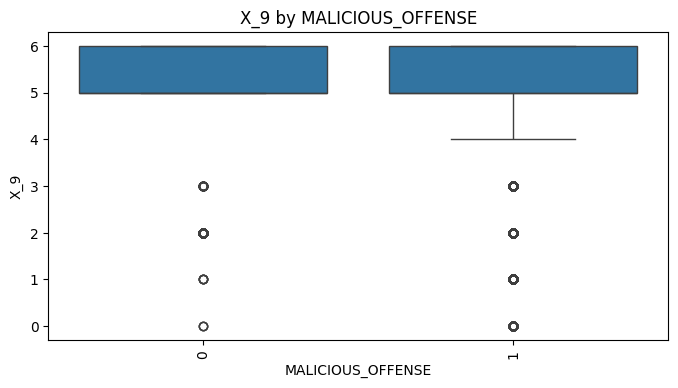

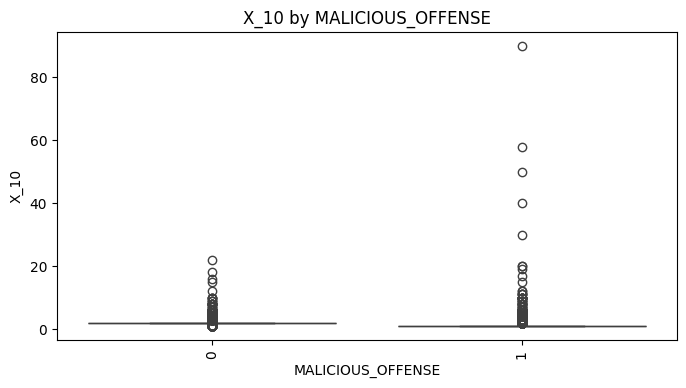

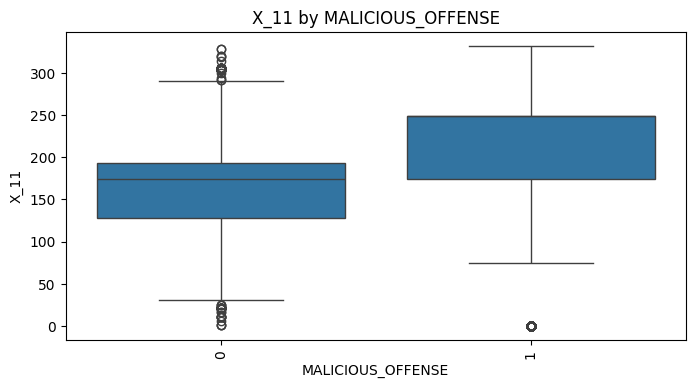

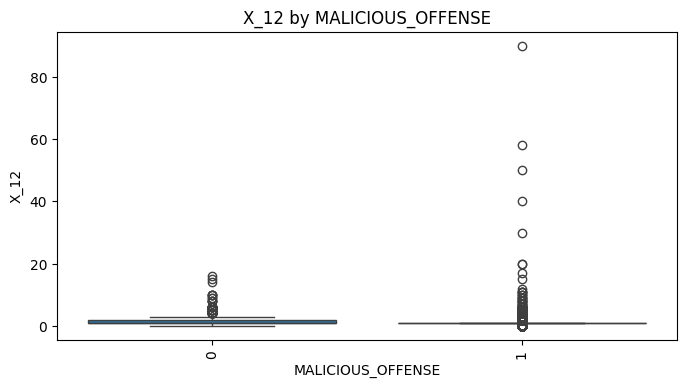

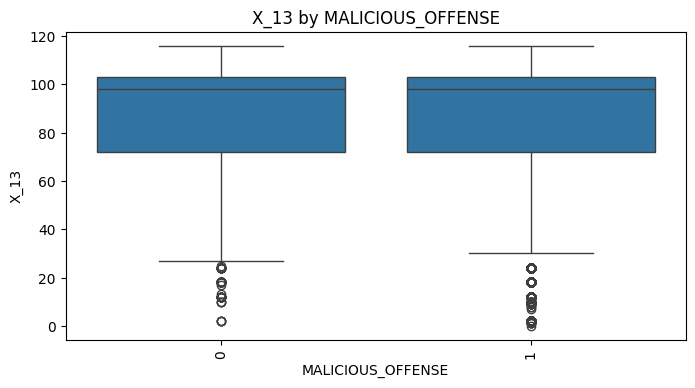

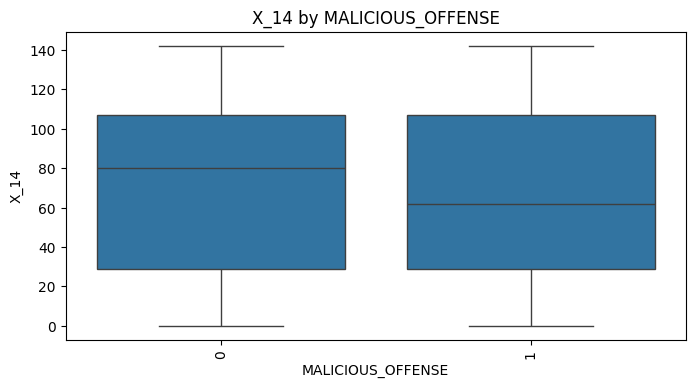

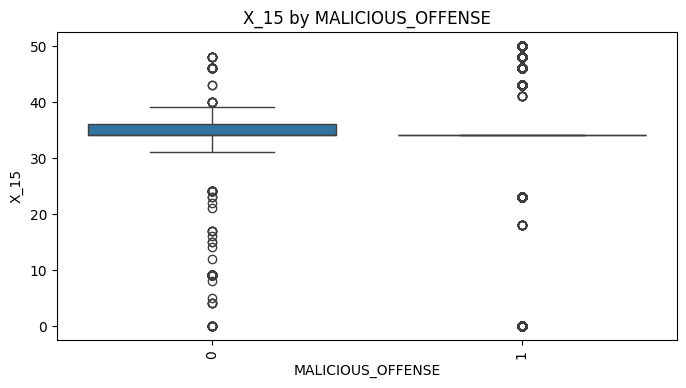

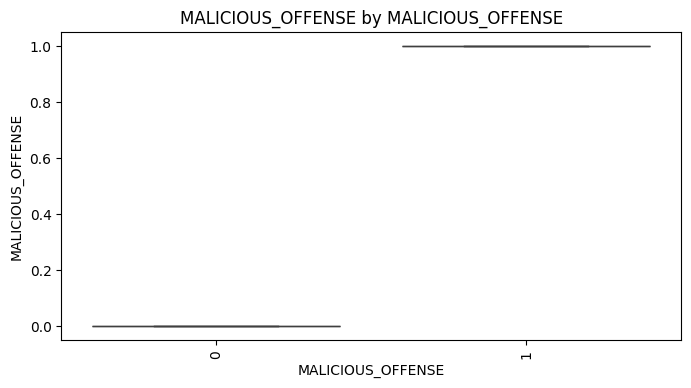

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset
df = pd.read_csv("Train.csv")

# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['MALICIOUS_OFFENSE']  # Target variable is categorical

# Handle missing values
df['X_12'].fillna(df['X_12'].median(), inplace=True)

# Determine layout dynamically
num_cols = len(numerical_cols)
nrows = math.ceil(num_cols / 3)

# Histograms for numerical data
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plot of all numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Pairwise scatter plots for numerical features
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Categorical vs Categorical - Count plot
sns.countplot(x=df['MALICIOUS_OFFENSE'])
plt.title("Distribution of MALICIOUS_OFFENSE")
plt.show()

# Categorical vs Numerical - Box plots
for num in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['MALICIOUS_OFFENSE'], y=df[num])
    plt.xticks(rotation=90)
    plt.title(f"{num} by MALICIOUS_OFFENSE")
    plt.show()

